## Trabajo práctico N6
### Modelos y Simulaciones - 2019
### Cátedra:

- Lic. Claudia López de Munain
- Lic. Bruno Alfredo Pazos

#### Integrantes:

- Serruya Aloisi, Luciano

1) Manufactura Mantel provee varios tipos de autopartes a las más importantes empresas automotrices y recientemente ha firmado un nuevo contrato para producir bombas de agua. Para ello, la capacidad de producción planeada es de 100 unidades por día, por cada turno. 

Debido a las fluctuaciones en la línea de ensamble, la demanda histórica presenta una distribución Normal de media 110 unidades diarias con un desvío estándar de 20 unidades. Para mantener un inventario suficiente que cumpla con los requerimientos de los clientes, los gerentes de Mantel están considerando una nueva política que consiste en producir durante un segundo turno si el inventario cae a 50 o menos unidades al final del día. El costo de mantener el stock es de $20 por unidad por día.

Para la planificación del presupuesto anual, los gerentes necesitan saber cuántos turnos adicionales serán necesarios en promedio si se aplica la nueva política de producción. Por último, también desean calcular el costo anual promedio del mantenimiento de stock.

- Consideraciones
    - El año se considera con 250 días hábiles
    - Es necesario simular 30 años para realizar las estimaciones
    - El inventario cuenta inicialmente con 80 unidades del producto
    - Se puede agregar un turno por día.

- Consignas

    a) Defina el o los objetivos de la simulación.
    
    b) Describa el modelo:
        i) Variables de entrada, salida y de estado.
        ii) Entidades y atributos.
        iii) Clasificación.
        iv) Características del inventario.
        
    c) Definir y justificar la “visión del mundo” y la forma de avance del tiempo que utilizará para realizar la simulación.
    
    d) Realice un diagrama de flujo o pseudocódigo que indique a grandes rasgos cómo va a realizar la simulación.
    
    e) Realice la simulación con el lenguaje de preferencia. Repita la simulación utilizando 60 y 70 como cantidad mínima de unidades diarias en el inventario.
    
    f) Calcule promedios de costos anuales para los 3 valores y los correspondientes I.C (99%). Grafique histogramas representativos.

---

**a)** Los objetivos de la simulación son calcular cuántos turnos adicionales serán necesarios (en promedio) aplicando la nueva política de producción, y obtener el costo anual (promedio) del mantenimiento del stock

**b)**
- Variables de entrada:
    - Cantidad de unidades que se producen por turno, en un día
    - Promedio de demanda por día
    - Desvío estándar de demanda por día
    - Umbral mínimo de stock
    - Costo de mantenimiento del stock
    - Cantidad de días hábiles en un año
    - Cantidad de años a simular
    - Stock inicial
    
- Variables de salida:
    - Cantidad de turnos adicionales requeridos
    - Costo anual del mantenimiento del stock
- Variables de estado:
    - Cantidad de turnos que se están realizando
    - Cantidad de unidades en stock
- Entidades: 
    - Pedido (una vez por día, con una cantidad N(110, 20))
    - Revisión (diaria)
- Clasificación: 
    - De simulación
    - Descriptivos
    - Discretos
    - Probabilístico
    - Formal
- Características del inventario: 
    - Demanda probabilística, independiente, y dinámica
    - Revisión periódica
    - Reaprovisionamiento continuo
    - Ciclo de inventario: una vez por día
    - Tiempo entre pedidos: una vez por día
    - Tiempo de entrega: no especificado
    - Punto de Reorden: 50 (nivel del stock en el que se incrementa la producción)
    - Descuentos por cantidad: no especificado
    - Faltante: no especificado
    - Costo de Pedido: no especificado
    - Costo de Compra: no especificado
    - Costo de Conservación: $20 diario por unidad
    - Costo por faltante: no especificado

**c)** La visión del mundo a implementar para este modelo será la de **escaneo de actividades**. La atención se pondrá en las actividades a realizar y en las condiciones que se tienen que cumplir para realizar una actividad (por ejemplo, agregar o remover un turno extra). El avance del tiempo será **fijo** y **discreto**

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def get_confidence_interval(n, mean, std, z_value=1.96, std_mult=1):
    """Calcula el intervalo de confianza para una media dada"""
    ci = z_value * ((std_mult * std) / (n ** 0.5))
    return ci

In [4]:
MAX_ANIOS=30
MAX_DIAS_POR_ANIO=250
STOCK_INICIAL=80
PRODUCCION_DIARIA_POR_TURNO=100
MEDIA_DEMANDA_DIARIA=110
DESVIO_ESTANDAR_DEMANDA_DIARA=20
COSTO_DIARIO_MANTENIMIENTO=20

In [5]:
def simulate(umbral_minimo):
    stock = STOCK_INICIAL
    cant_turnos_actual = 1
    costos_mantenimiento_anual = []
    cant_turnos_agregados_anual = []

    for _ in range(MAX_ANIOS):    
        cant_turnos_agregados = 0
        costo_mantenimiento_stock = 0
        for _ in range(MAX_DIAS_POR_ANIO):
            
            # Incrementamos el stock según la cantidad de turnos
            stock += cant_turnos_actual * PRODUCCION_DIARIA_POR_TURNO
            
            # Decrementamos el stock según la demanda diaria
            stock -= np.random.normal(MEDIA_DEMANDA_DIARIA, DESVIO_ESTANDAR_DEMANDA_DIARA)
            
            # Si el stock es menor al umbral, llevamos la cantidad de turnos a 2
            if (stock <= umbral_minimo):
                cant_turnos_actual = 2
                cant_turnos_agregados += 1
            else:
                cant_turnos_actual = 1
                
            costo_mantenimiento_stock += stock * COSTO_DIARIO_MANTENIMIENTO
            
        costos_mantenimiento_anual.append(costo_mantenimiento_stock)
        cant_turnos_agregados_anual.append(cant_turnos_agregados)


    return costos_mantenimiento_anual, cant_turnos_agregados_anual

Promedio de costos mensual (umbral mínimo = 50) => 41427.35, con un margen de error de 230.63 (95% de confianza)
Promedio de costos mensual (umbral mínimo = 60) => 46391.95, con un margen de error de 258.00 (95% de confianza)
Promedio de costos mensual (umbral mínimo = 70) => 50367.53, con un margen de error de 184.48 (95% de confianza)


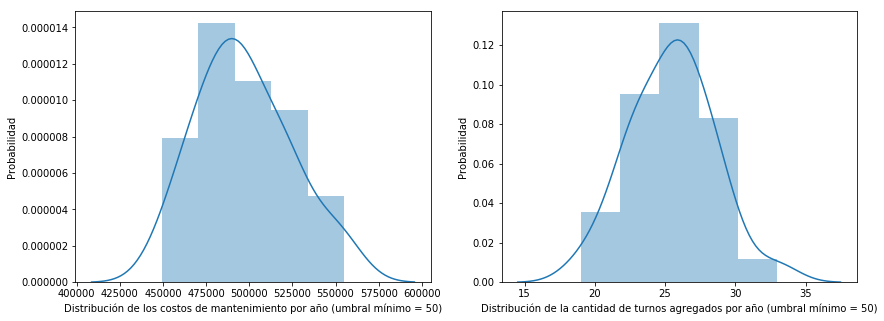

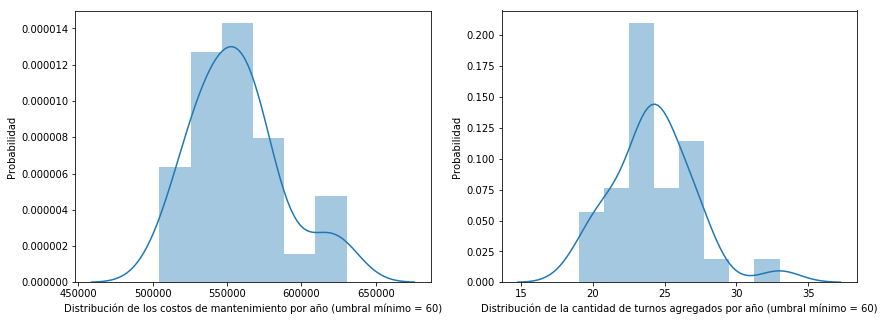

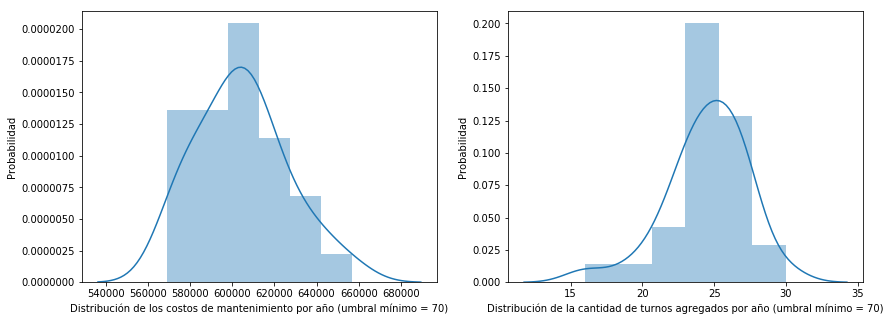

In [13]:
for umbral in [50, 60, 70]:
    
    costos_anuales, turnos_agregados_anuales = simulate(umbral)    
    promedio_mensual = np.mean(costos_anuales) / 12
    desvio_estandar_mensual = np.std(costos_anuales) / 12
    ic = get_confidence_interval((len(costos_anuales) * 12), promedio_mensual, desvio_estandar_mensual)
    
    print(f"Promedio de costos mensual (umbral mínimo = {umbral}) => {promedio_mensual:.2f}, con un margen de error de {ic:.2f} (95% de confianza)")
    
    fig, axs = plt.subplots(ncols=2, figsize=(14,5))
    axs[0].set(xlabel=f'Distribución de los costos de mantenimiento por año (umbral mínimo = {umbral})', ylabel="Probabilidad")
    axs[1].set(xlabel=f'Distribución de la cantidad de turnos agregados por año (umbral mínimo = {umbral})', ylabel="Probabilidad")
    sns.distplot(costos_anuales, ax=axs[0])
    sns.distplot(turnos_agregados_anuales, ax=axs[1])